# CNN Mulit-class Classification with Image Data Generators using Tensorflow and Keras
The task will be to build a `CNN` model using `Tensorflow` and `Keras` that can classify the Rock, Paper, Scissors image data set with can be downloaded from [rps_train_validation](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip) for training and validation and [rps_test](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip) for testing.

The packages used are the following:

- `os`
- `tensorflow`
- `numpy`
- `matplotlib`
- `PIL`
- `random`

Task outline:
1. Setting up the paths for training and validation
2. Creating a custom funciton to view the images
3. Creating the data generation and augmentation pipelines
4. Creating the model function
5. Creating and training the custom model
6. Model Summary of the custom model
7. Examining the Accuracy and Loss of training and validation
8. Testing the model over new unseen images

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import random

## 1. Setting up the paths for training and validation

In [2]:
path = os.getcwd()

train_path = os.path.join(path, r'DataSets\rps\rps-train')
val_path = os.path.join(path, r'DataSets\rps\rps-validation')

train_path_r = os.path.join(train_path, r'rock')
train_path_o = os.path.join(train_path, r'paper')
train_path_s = os.path.join(train_path, r'scissors')
val_path_r = os.path.join(val_path, r'rock')
val_path_p = os.path.join(val_path, r'paper')
val_path_s = os.path.join(val_path, r'scissors')

images_paths_list = [train_path_r, train_path_o, train_path_s,
                     val_path_r, val_path_p, val_path_s]

## 2. Creating a custom funciton to view the images

In [3]:
# Function definition
def check_random_images(images_path, num_images=3, label='class 1', resize=None):
    """
    Randomly gets and displays `num_images` of the images from the given `images_path` and labels them with `label`.
    """
    images_lsit = os.listdir(images_path)
    i = 1
    plt.figure(figsize=(15, 30))
    for j, k in enumerate(random.sample(images_lsit, num_images)):
        image = PIL.Image.open(os.path.join(images_path, k))
        if resize is not None:
            image = image.resize((resize, resize))
            
        plot = plt.subplot(10, 5, i + j)
        plot.axis('Off')
        plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
        plt.title(label=label, c='w', size=13)
        plt.imshow(image)

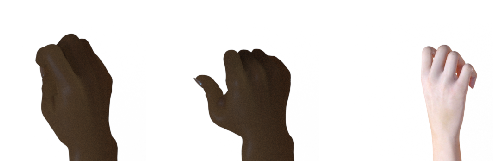

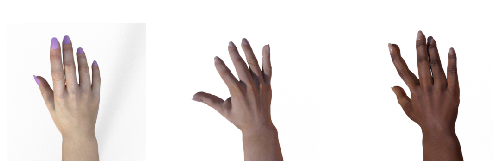

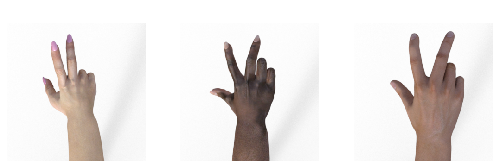

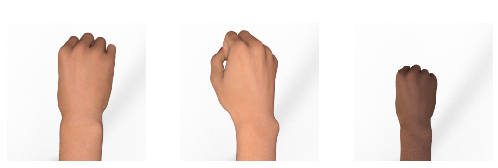

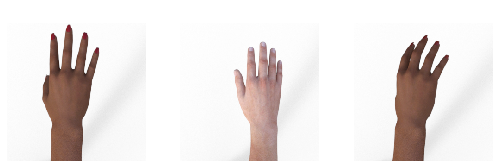

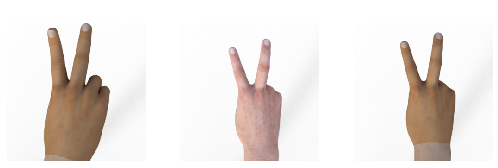

In [4]:
# Viewing the sample images from each of the paths
for p in images_paths_list:
    label_ = p.split('-')[-1]
    check_random_images(p, label=label_)

## 3. Creating the data generation and augmentation pipelines

In [5]:
# Training pipeline
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=40,
                                                                width_shift_range=0.2, height_shift_range=0.2,
                                                                shear_range=0.2, zoom_range=0.2,
                                                                horizontal_flip=False, fill_mode='nearest')

train_images = train_data_gen.flow_from_directory(train_path, target_size=(128, 128), batch_size=32, class_mode='categorical')

# Validation pipeline
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_images = val_data_gen.flow_from_directory(val_path, target_size=(128, 128), batch_size=32, class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## 4. Creating the model function

In [6]:
def build_keras_cnn(train_images, val_images, layers_structure=[512, 3], lr=0.0001, epochs=30, target_accuracy=0.95,
                   include_cnn=True, num_filters=64, filters_size=3, input_shape=128, num_cnn=0, double_filters=True, verbose=1):
    """
    Builds, fits, and trains a `Keras` DNN with the option to include CNN layers.
    """
    layers = [tf.keras.layers.Flatten()]
    for l in layers_structure[: -1]:
        layers.append(tf.keras.layers.Dense(units=l, activation='relu'))
    layers.append(tf.keras.layers.Dense(units=layers_structure[-1], activation='softmax'))
    
    if include_cnn:
        cnn_layers = [tf.keras.layers.Conv2D(num_filters, (filters_size, filters_size), input_shape=(input_shape, input_shape, 3), activation='relu'),
                      tf.keras.layers.MaxPool2D((2, 2))]
        
        for l in range(num_cnn):
            if double_filters and filters_size < 128:
                cnn_layers.append(tf.keras.layers.Conv2D(num_filters * 2, (filters_size, filters_size), activation='relu'))
                cnn_layers.append(tf.keras.layers.MaxPool2D((2, 2)))
            else:
                cnn_layers.append(tf.keras.layers.Conv2D(num_filters, (filters_size, filters_size), activation='relu'))
                cnn_layers.append(tf.keras.layers.MaxPool2D((2, 2)))
                
        for i, l in enumerate(cnn_layers):
            layers.insert(i, l)
    
    model = tf.keras.models.Sequential(layers)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') >= target_accuracy:
                self.model.stop_training = True
                print(f'\n\nTarget accuracy level of {target_accuracy * 100}% reached, training has been stoped.')
    
    callbacks = myCallback()
    
    history = model.fit(train_images, validation_data=val_images, epochs=epochs, steps_per_epoch=20, validation_steps=3, callbacks=[callbacks], verbose=verbose)
    
    return history

## 5. Creating and training the custom model

In [8]:
model_cnn = build_keras_cnn(train_images, val_images, layers_structure=[512, 3], lr=0.0001, epochs=30, target_accuracy=0.95,
                   include_cnn=True, num_filters=64, filters_size=3, input_shape=128, num_cnn=3, double_filters=True, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/30
20/20 [==============================] - 16s 778ms/step - loss: 1.0941 - accuracy: 0.3797 - val_loss: 1.0833 - val_accuracy: 0.3646
Epoch 2/30
20/20 [==============================] - 15s 769ms/step - loss: 1.0824 - accuracy: 0.3875 - val_loss: 1.0503 - val_accuracy: 0.5521
Epoch 3/30
20/20 [==============================] - 15s 771ms/step - loss: 1.0475 - accuracy: 0.4573 - val_loss: 0.9917 - val_accuracy: 0.4896
Epoch 4/30
20/20 [==============================] - 15s 767ms/step - loss: 0.9770 - accuracy: 0.5000 - val_loss: 0.9261 - val_accuracy: 0.5833
Epoch 5/30
20/20 [==============================] - 15s 748ms/step - loss: 0.9479 - accuracy: 0.5316 - val_loss: 0.8508 - val_accuracy: 0.6562
Epoch 6/30
20/20 [==============================] - 15s 760ms/step - loss: 0.8526 - accuracy: 0.6125 - val_loss: 0.7260 - val_accuracy: 0.7604
Epoch 7/30
20/20 [==============================] -

## 6. Model Summary of the custom model:

In [9]:
model_cnn.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

## 7. Examining the Accuracy and Loss of training and validation:

In [11]:
num_epochs = len(model_cnn.history['accuracy'])
train_acc = model_cnn.history['accuracy']
train_loss = model_cnn.history['loss']
val_acc = model_cnn.history['val_accuracy']
val_loss = model_cnn.history['val_loss']

In [12]:
from matplotlib import style
style.use('seaborn')

Text(0.5, 1.0, 'Train vs. Validation Losses')

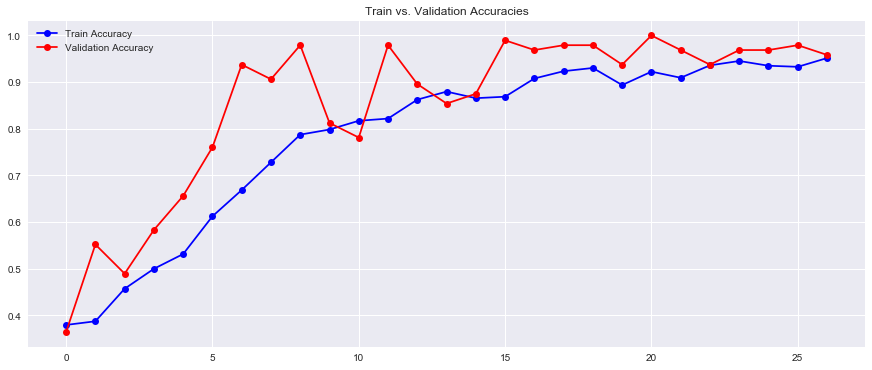

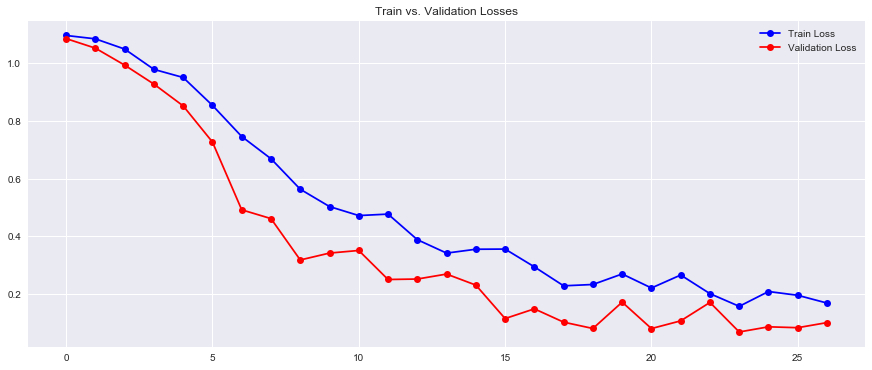

In [14]:
epochs_range = range(num_epochs)

plt.figure(figsize=(15,6))
plt.plot(epochs_range, train_acc, 'bo-', label='Train Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.legend()
plt.title('Train vs. Validation Accuracies')

plt.figure(figsize=(15,6))
plt.plot(epochs_range, train_loss, 'bo-', label='Train Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.legend()
plt.title('Train vs. Validation Losses')

The above graphs show how the model performs over each epoch. The gradual smooth increase of accuracy and decrease of loss is a good sign of the model's stability. The validation accuracy is a bit jagged, up to the 12th epoch after which it stabilizes. This is mainly due to the regularization effect of image augmentation as it produces relatively 'hard' examples for training while original images, which the model sees as being different, are used with validation. But as the model gets better over epochs, it starts to show similar behavior in both training and validation accuracies.

## 8. Testing the model over new unseen images:

In [16]:
test_path = os.path.join(path, r'DataSets\rps\rps-test')

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_images = test_data_gen.flow_from_directory(test_path, target_size=(128, 128), batch_size=32, class_mode='categorical')

Found 33 images belonging to 3 classes.


In [18]:
model_cnn.model.evaluate(test_images)

  ...
    to  
  ['...']
2/2 [==============================] - 0s 174ms/step - loss: 0.1266 - accuracy: 0.9394


[0.1266005546785891, 0.93939394]

Both the loss and accuracy of the test images show close performance to the model's training and validation numbers. This is great considering that it is not a heavily tuned model. Therefore, with some time spent on fine tuning by improving the structure and hyperparameters, the performance can potentially reach a perfect score on this data set.